In [55]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from pathlib import Path
import pickle
%matplotlib inline

# Configuration

In [56]:
rc("font", size=18, weight="normal")

In [57]:
DATADIR = Path("data", "sk_finite_size")

# Data loading

## Load all results

In [58]:
full_results = {}
for result_file in Path(DATADIR).glob("sk_finite*.pickle"):
    with result_file.open("rb") as f:
        result = pickle.load(f)
        p = len(result["betas"])
        if p not in full_results:
            full_results[p] = {}
        if result["n"] not in full_results[p]:
            full_results[p][result["n"]] = {"rescaled_samples": []}
        full_results[p][result["n"]]["rescaled_samples"].extend(result["rescaled_samples"])
results = {}
for p in full_results:
    results[p] = []
    for n in sorted(full_results[p]):
        results[p].append({"n": n, "energy": float(np.mean(np.real(full_results[p][n]["rescaled_samples"])).real), "energy_std": float(np.std([z.real for z in full_results[p][n]["rescaled_samples"]])) / np.sqrt(len(full_results[p][n]["rescaled_samples"]))})

## Parameters

In [62]:
p = 2 # QAOA depth, should be 2 or 3 (1 = analytically solvable case)

## Select results

In [63]:
n_values = [result["n"] for result in results[p]]
energy_values = np.array([result["energy"] for result in results[p]])
energy_std_values = np.array([result["energy_std"] for result in results[p]])

# Figure

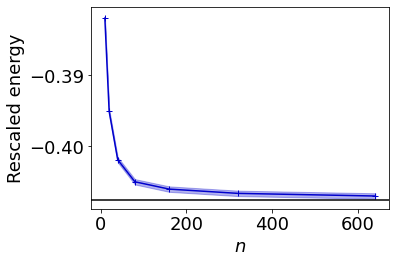

In [64]:
infinite_size_expectation = -0.40754502990798835 if p == 2 else -0.47261898090097954
fig, ax = plt.subplots()
ax.plot(n_values, energy_values, "+-", color=(0, 0, 0.8), label="Finite-size energy")
ax.axhline(infinite_size_expectation, color="k", label="Infinite-size energy")
ax.fill_between(n_values, energy_values - energy_std_values, energy_values + energy_std_values, color=(0, 0, 0.8, 0.3))
ax.set_xlabel("$n$")
ax.set_ylabel("Rescaled energy")
fig.tight_layout()
fig.savefig(Path("figures", f"finite_size_sk_p={p}.png"))